<a href="https://colab.research.google.com/github/muzaqqa/Adept-Internship/blob/main/neural%20networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
data=pd.read_csv('data.csv')
print(data)


    Experience Years  Salary
0                1.1   39343
1                1.2   42774
2                1.3   46205
3                1.5   37731
4                2.0   43525
5                2.2   39891
6                2.5   48266
7                2.9   56642
8                3.0   60150
9                3.2   54445
10               3.2   64445
11               3.5   60000
12               3.7   57189
13               3.8   60200
14               3.9   63218
15               4.0   55794
16               4.0   56957
17               4.1   57081
18               4.3   59095
19               4.5   61111
20               4.7   64500
21               4.9   67938
22               5.1   66029
23               5.3   83088
24               5.5   82200
25               5.9   81363
26               6.0   93940
27               6.2   91000
28               6.5   90000
29               6.8   91738
30               7.1   98273
31               7.9  101302
32               8.2  113812
33            

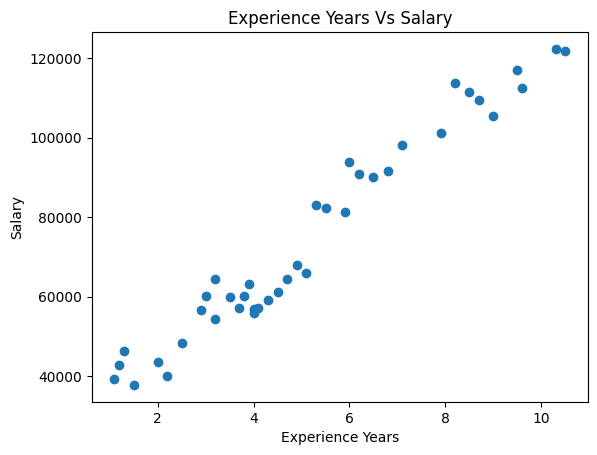

In [8]:
plt.scatter(data['Experience Years'], data['Salary'])
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.title('Experience Years Vs Salary')
plt.show()

In [13]:

def loss_function(m, b, points):
    total_error = 0
    for i in range(len(points)):
        x = points.iloc[i]['Experience Years']
        y = points.iloc[i]['Salary']
        total_error += (y - (m * x + b)) ** 2
    return total_error / float(len(points))

m = 1.0
b = 0.0

loss = loss_function(m, b, data)
print(loss)


6242129365.776251


In [12]:

def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0
    n = float(len(points))
    for i in range(len(points)):
        x = points.iloc[i]['Experience Years']
        y = points.iloc[i]['Salary']
        m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
        b_gradient += -(2/n) * (y - (m_now * x + b_now))
    m = m_now - L * m_gradient
    b = b_now - L * b_gradient
    return m, b

m_now = 0.0
b_now = 0.0
L = 0.01

m, b = gradient_descent(m_now, b_now, data, L)
print(m, b)


9020.02165 1494.8725


Epoch 0: m = 90.20021650000001, b = 14.948725000000001


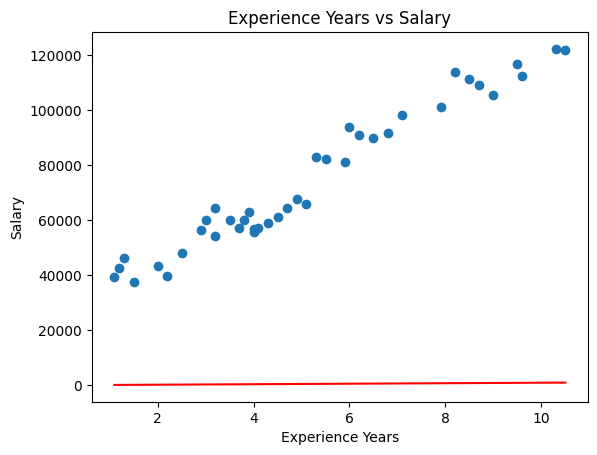

Epoch 100: m = 6586.14480808746, b = 1118.65391026583


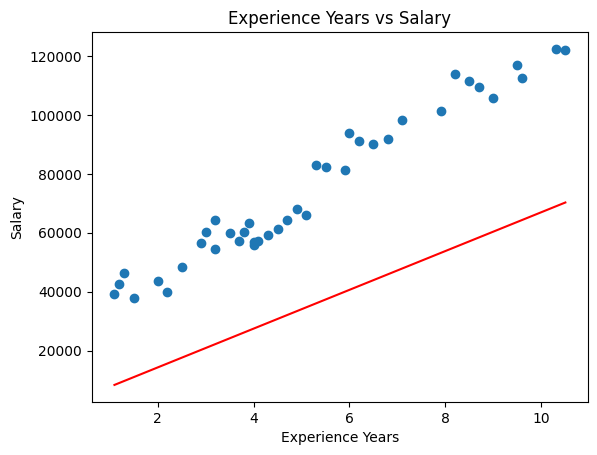

Epoch 200: m = 9844.759447858945, b = 1720.5180924907254


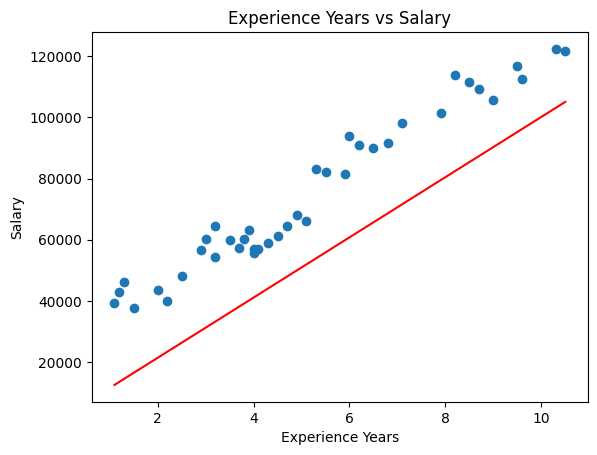

Epoch 300: m = 11475.809098287373, b = 2069.888299512356


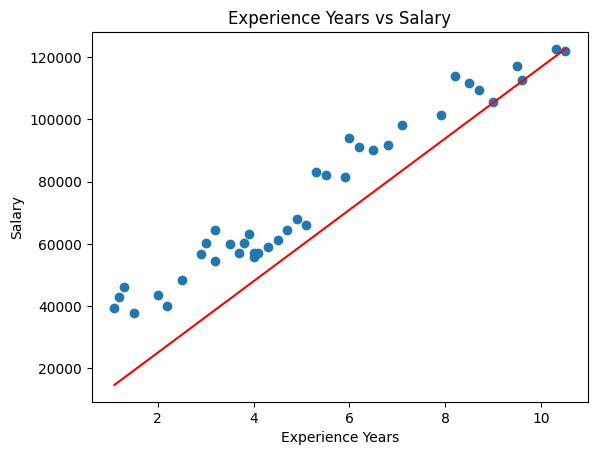

Epoch 400: m = 12288.616239812865, b = 2292.1265668516353


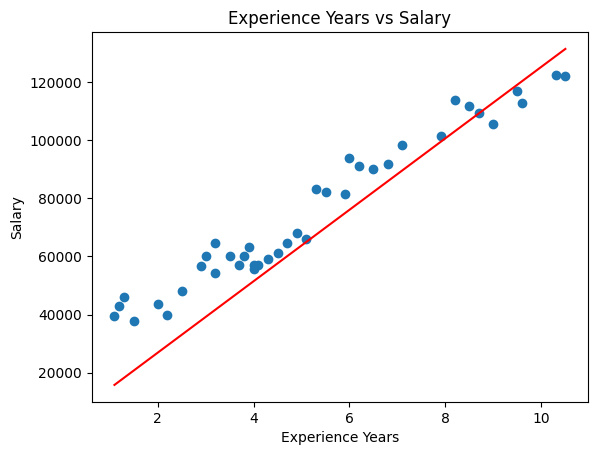

Epoch 500: m = 12690.074300239701, b = 2450.2604504902047


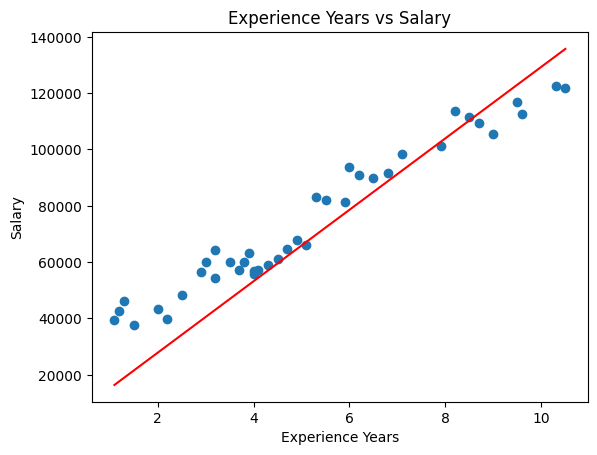

Epoch 600: m = 12884.752185807369, b = 2575.9783301529487


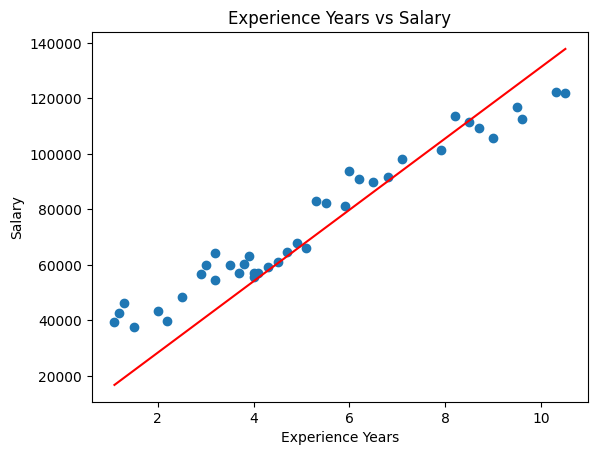

Epoch 700: m = 12975.498482951924, b = 2685.2125534323723


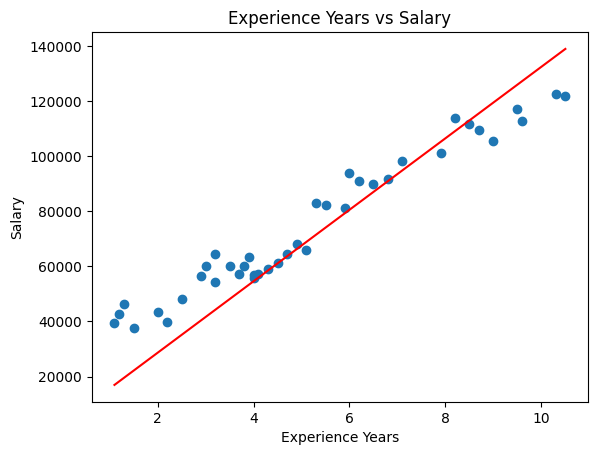

Epoch 800: m = 13014.021049671057, b = 2785.973989907191


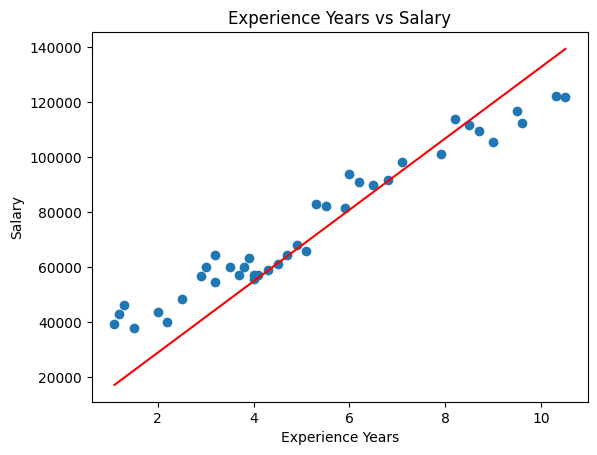

Epoch 900: m = 13026.316321832983, b = 2882.2909177907495


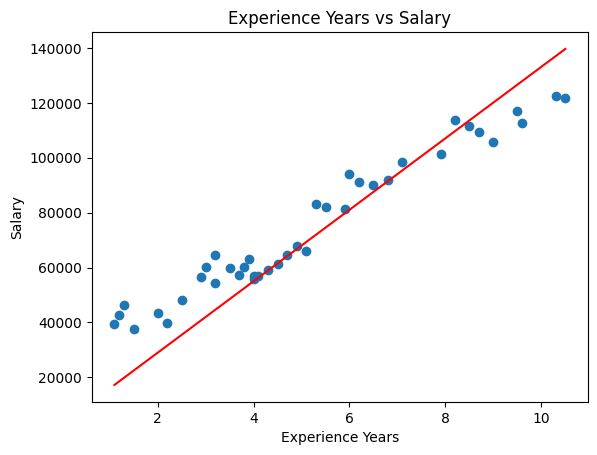

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('data.csv')

m = 0
b = 0
L = 0.0001
epochs = 1000
def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0
    n = float(len(points))
    for i in range(int(n)):
        x = points.iloc[i]['Experience Years']
        y = points.iloc[i]['Salary']
        m_gradient += -(2/n) * x * (y - ((m_now * x) + b_now))
        b_gradient += -(2/n) * (y - ((m_now * x) + b_now))
    m_new = m_now - (L * m_gradient)
    b_new = b_now - (L * b_gradient)
    return m_new, b_new
for i in range(epochs):
    m, b = gradient_descent(m, b, data, L)
    if i % 100 == 0:
        print(f"Epoch {i}: m = {m}, b = {b}")

        plt.scatter(data['Experience Years'], data['Salary'])
        y_pred = m * data['Experience Years'] + b
        plt.plot(data['Experience Years'], y_pred, color='red')
        plt.xlabel('Experience Years')
        plt.ylabel('Salary')
        plt.title('Experience Years vs Salary')
        plt.show()


Epoch 0, MSE: 6.725646694941096
Epoch 100, MSE: 0.10096651706312318
Epoch 200, MSE: 0.06445578831512436
Epoch 300, MSE: 0.04964082615073512
Epoch 400, MSE: 0.04322204945279923
Epoch 500, MSE: 0.04041812945236404
Epoch 600, MSE: 0.03914253966875174
Epoch 700, MSE: 0.038506939339340504
Epoch 800, MSE: 0.03813918555615242
Epoch 900, MSE: 0.037884961917631334


Text(0.5, 0, 'Experience Years')

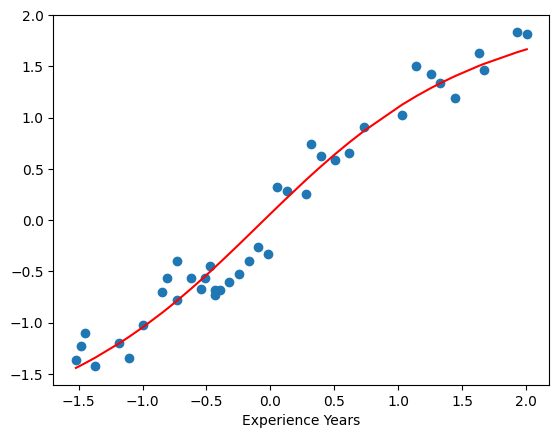

In [15]:
import pandas as pd
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.z2
        return self.a2

    def backward(self, X, y, learning_rate):
        m = len(X)
        dZ2 = self.a2 - y
        dW2 = np.dot(self.a1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        dZ1 = np.dot(dZ2, self.W2.T) * self.sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            y_pred = self.forward(X)
            self.backward(X, y, learning_rate)
            if epoch % 100 == 0:
                mse = np.mean((y_pred - y) ** 2)
                print(f"Epoch {epoch}, MSE: {mse}")

    def predict(self, X):
        return self.forward(X)

data = pd.read_csv('data.csv')

data['Experience Years'] = (data['Experience Years'] - data['Experience Years'].mean()) / data['Experience Years'].std()
data['Salary'] = (data['Salary'] - data['Salary'].mean()) / data['Salary'].std()

X = data[['Experience Years']].values
y = data[['Salary']].values

input_size = 1
hidden_size = 10
output_size = 1
epochs = 1000
learning_rate = 0.01

nn = NeuralNetwork(input_size, hidden_size, output_size)
nn.train(X, y, epochs, learning_rate)

predictions = nn.predict(X)

import matplotlib.pyplot as plt

plt.scatter(data['Experience Years'], data['Salary'], label='Actual data')
plt.plot(data['Experience Years'], predictions, color='red', label='Predicted data')
plt.xlabel('Experience Years')


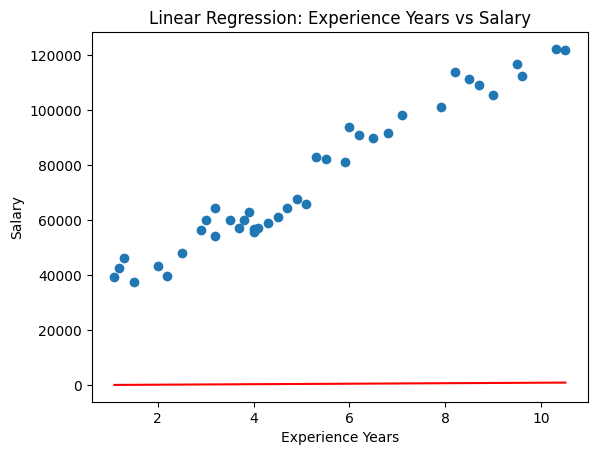

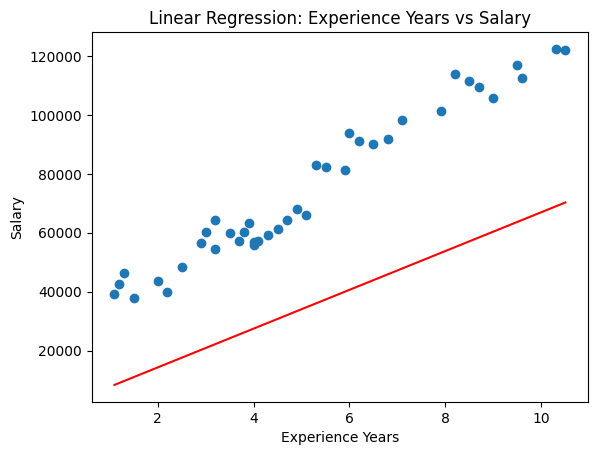

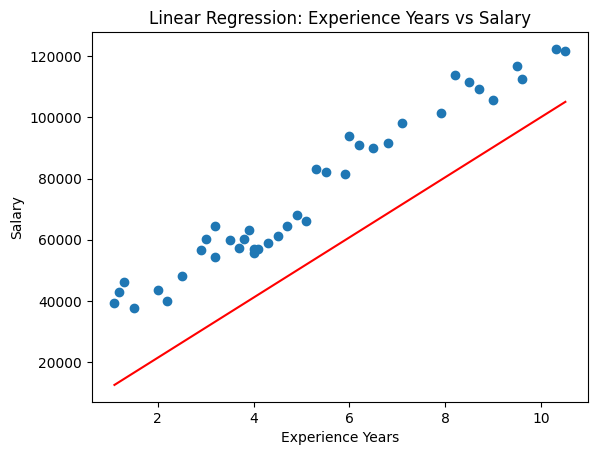

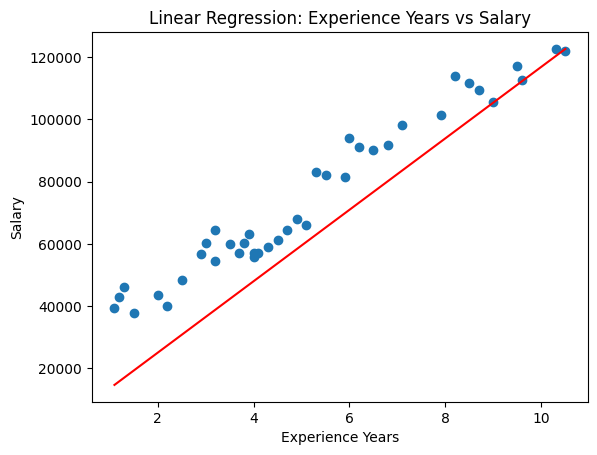

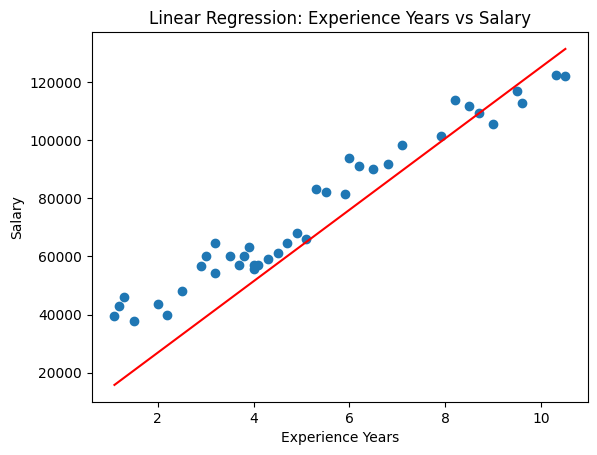

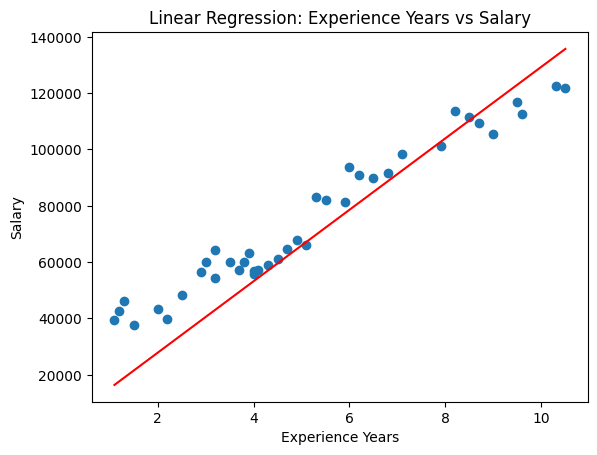

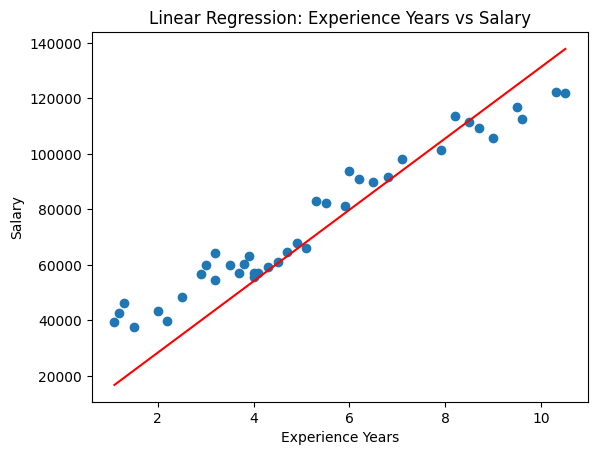

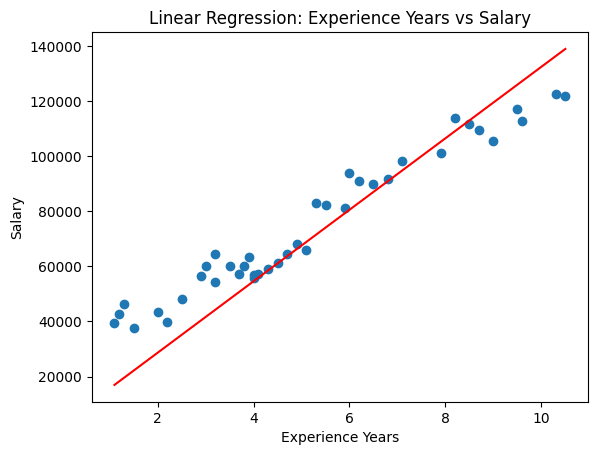

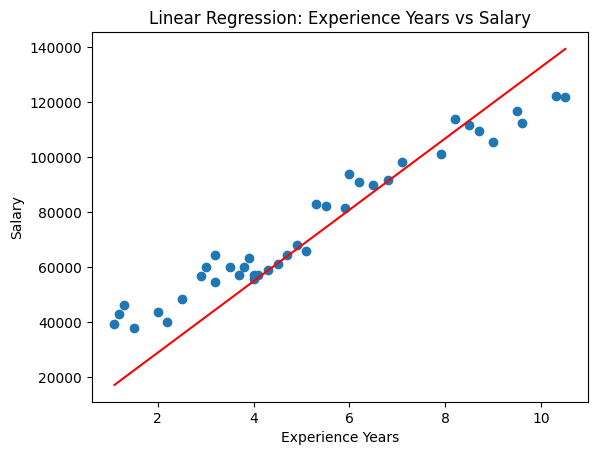

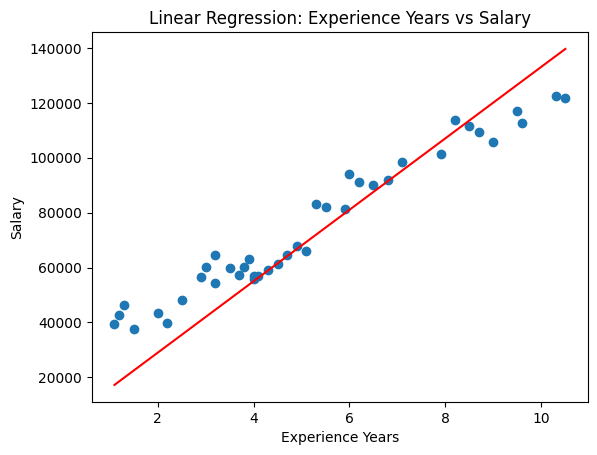

MSE (Linear Regression): 135459559.27895507
Epoch 0, MSE: 1.2760958923167969
Epoch 100, MSE: 0.09650258407272105
Epoch 200, MSE: 0.08398758695545987
Epoch 300, MSE: 0.0733067436977548
Epoch 400, MSE: 0.0640231881091613
Epoch 500, MSE: 0.055949784178151475
Epoch 600, MSE: 0.048926096950704566
Epoch 700, MSE: 0.04281406735622685
Epoch 800, MSE: 0.03749454279225297
Epoch 900, MSE: 0.03286443968949182


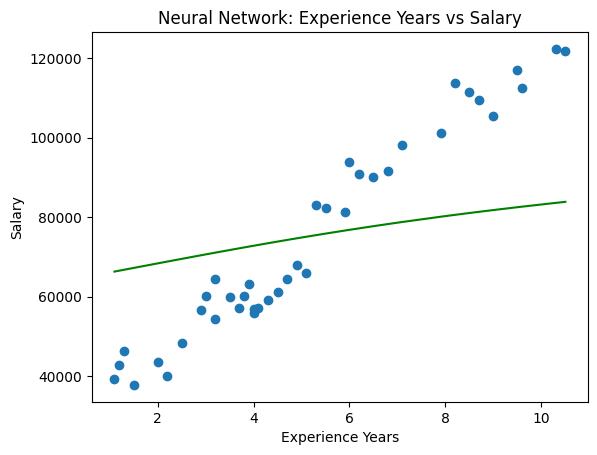

MSE (Neural Network): 681425698.1284045


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv('data.csv')


def loss_function(m, b, points):
    total_error = 0
    for i in range(len(points)):
        x = points.iloc[i]['Experience Years']
        y = points.iloc[i]['Salary']
        total_error += (y - (m * x + b)) ** 2
    return total_error / float(len(points))

def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0
    n = float(len(points))
    for i in range(int(n)):
        x = points.iloc[i]['Experience Years']
        y = points.iloc[i]['Salary']
        m_gradient += -(2/n) * x * (y - ((m_now * x) + b_now))
        b_gradient += -(2/n) * (y - ((m_now * x) + b_now))
    m_new = m_now - (L * m_gradient)
    b_new = b_now - (L * b_gradient)
    return m_new, b_new

m_lr = 0
b_lr = 0
L_lr = 0.0001
epochs_lr = 1000

for i in range(epochs_lr):
    m_lr, b_lr = gradient_descent(m_lr, b_lr, data, L_lr)
    if i % 100 == 0:
        plt.scatter(data['Experience Years'], data['Salary'])
        y_pred_lr = m_lr * data['Experience Years'] + b_lr
        plt.plot(data['Experience Years'], y_pred_lr, color='red')
        plt.xlabel('Experience Years')
        plt.ylabel('Salary')
        plt.title('Linear Regression: Experience Years vs Salary')
        plt.show()
mse_lr = loss_function(m_lr, b_lr, data)
print(f"MSE (Linear Regression): {mse_lr}")

X_nn = data['Experience Years'].values.reshape(-1, 1) / np.max(data['Experience Years'])
y_nn = data['Salary'].values.reshape(-1, 1) / np.max(data['Salary'])

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.z2
        return self.a2

    def backward(self, X, y, learning_rate):
        m = len(X)
        dZ2 = self.a2 - y
        dW2 = np.dot(self.a1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        dZ1 = np.dot(dZ2, self.W2.T) * self.sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            y_pred = self.forward(X)
            self.backward(X, y, learning_rate)
            if epoch % 100 == 0:
                mse = np.mean((y_pred - y) ** 2)
                print(f"Epoch {epoch}, MSE: {mse}")

    def predict(self, X):
        return self.forward(X)

input_size = X_nn.shape[1]
hidden_size = 10
output_size = 1
nn = NeuralNetwork(input_size, hidden_size, output_size)
epochs_nn = 1000
learning_rate_nn = 0.01
nn.train(X_nn, y_nn, epochs_nn, learning_rate_nn)

y_pred_nn = nn.predict(X_nn) * np.max(data['Salary'])

plt.scatter(data['Experience Years'], data['Salary'])
plt.plot(data['Experience Years'], y_pred_nn, color='green')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.title('Neural Network: Experience Years vs Salary')
plt.show()

mse_nn = np.mean((y_pred_nn - data['Salary'].values) ** 2)
print(f"MSE (Neural Network): {mse_nn}")
